# 解答例：Week2 授業前課題1 小麦とチェス盤問題

**ポイント：numpyを使い数値計算を効率的に行える事を知ろう**

## 小麦とチェス盤問題

曽呂利新左衛門の米の逸話に似たものとして、小麦とチェス盤の話があります。これを題材に多次元配列を扱うための数値計算ライブラリ **NumPy** の使い方に慣れていきます。

> If a chessboard were to have wheat placed upon each square such that one grain were placed on the first square, two on the second, four on the third, and so on (doubling the number of grains on each subsequent square), how many grains of wheat would be on the chessboard at the finish?

[Wheat and chessboard problem - Wikipedia](https://en.wikipedia.org/wiki/Wheat_and_chessboard_problem)（最終閲覧日：2019年5月31日）

8×8マスのチェス盤の上に、小麦の粒を1, 2, 4と順番に置いていくと最終的な小麦の数はどのようになるかという問題です。


In [2]:
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
n_squares = 4
small_board_list = [1]
for _ in range(n_squares - 1):
    small_board_list.append(2*small_board_list[-1])
print("4マスの板に小麦を並べる（リスト）：{}".format(small_board_list))

small_board_ndarray = np.array(small_board_list)
print("4マスの板に小麦を並べる（ndarray）：{}".format(small_board_ndarray))

4マスの板に小麦を並べる（リスト）：[1, 2, 4, 8]
4マスの板に小麦を並べる（ndarray）：[1 2 4 8]


listとndarrayの表示上の違いは、listはカンマで区切られ、ndarrayは区切られています。

### 【問題1】2×2マスのチェス盤の小麦の数
**ポイント：numpyを使い行列操作をしてみよう**

2×2マスのチェス盤をndarrayによって表現し、各マスの小麦の数を計算してください。左上のマスに小麦を1つ置いた後、その右が2つ、左下が4つ、右下が8つという風に進みます。

サンプルコードで作成したndarrayのshapeの変形を行ってください。

#### （解説）

`reshape`メソッドを使うことでndarrayの変形が行えます。

In [4]:
square_size = (2, 2)
small_board_ndarray = small_board_ndarray.reshape(square_size)
print("2×2マスのチェス盤：\n{}".format(small_board_ndarray))

2×2マスのチェス盤：
[[1 2]
 [4 8]]


In [5]:
small_board_ndarray = small_board_ndarray.reshape(2, 2)
print("2×2マスのチェス盤：\n{}".format(small_board_ndarray))

2×2マスのチェス盤：
[[1 2]
 [4 8]]


### 【問題2】n×mマスへの拡張
**ポイント：list.appendのおさらいとnp.arrayの組み合わせ**

n×mマスのチェス盤の小麦の数を記したndarrayを返す関数を作成してください。そして、この関数を使い8×8マスのチェス盤の小麦の数を求めてください。

#### （解説）

問題1をベースに関数化します。マス目の数に関係する部分を引数として受け取るようにします。

以下の例では表示桁数が多く一行が長くなり見にくいことを解決するため、`np.set_printoptions(precision=1)`を実行しています。これによりndarrayの出力時の桁数を小数点以下1桁に指定しています。

[numpy.set_printoptions — NumPy v1.16 Manual](https://docs.scipy.org/doc/numpy/reference/generated/numpy.set_printoptions.html)

元の状態に戻すためには以下の引数で実行します。

```py
np.set_printoptions(edgeitems=3,infstr='inf',
                            linewidth=75, nanstr='nan', precision=8,
                            suppress=False, threshold=1000, formatter=None)
```

In [4]:
def chess_board(square_size=(8, 8)):
    """
    小麦とチェス盤の逸話の計算を行う関数
    
    Parameters:
    -----------------
    square_size : tuple of int
        マス目の数（default: (8, 8)）
    Returns
    -----------------
    board_ndarray：ndarray, shape(square_size)
        チェス盤の上の小麦の数を記録した配列
    """
    n_squares = square_size[0]*square_size[1]
    board_list = [1]
    for _ in range(n_squares - 1):
        board_list.append(2*board_list[-1])
    board_ndarray = np.array(board_list).reshape(square_size)
    return board_ndarray

square_size = (8, 8)
board_ndarray = chess_board(square_size=square_size)

np.set_printoptions(precision=1) # ndarrayを出力する際の桁数を指定し見やすくする
print("{}マスのチェス盤：\n{}".format(square_size, board_ndarray))

(8, 8)マスのチェス盤：
[[1.0e+00 2.0e+00 4.0e+00 8.0e+00 1.6e+01 3.2e+01 6.4e+01 1.3e+02]
 [2.6e+02 5.1e+02 1.0e+03 2.0e+03 4.1e+03 8.2e+03 1.6e+04 3.3e+04]
 [6.6e+04 1.3e+05 2.6e+05 5.2e+05 1.0e+06 2.1e+06 4.2e+06 8.4e+06]
 [1.7e+07 3.4e+07 6.7e+07 1.3e+08 2.7e+08 5.4e+08 1.1e+09 2.1e+09]
 [4.3e+09 8.6e+09 1.7e+10 3.4e+10 6.9e+10 1.4e+11 2.7e+11 5.5e+11]
 [1.1e+12 2.2e+12 4.4e+12 8.8e+12 1.8e+13 3.5e+13 7.0e+13 1.4e+14]
 [2.8e+14 5.6e+14 1.1e+15 2.3e+15 4.5e+15 9.0e+15 1.8e+16 3.6e+16]
 [7.2e+16 1.4e+17 2.9e+17 5.8e+17 1.2e+18 2.3e+18 4.6e+18 9.2e+18]]


#### （別解）

`n_squares = square_size[0]*square_size[1]`の箇所は、以下のようにndarrayに変換し`prod`メソッドまたは`prod`関数を使うことでも計算できます。要素全てを掛け合わた数を返す総積の計算を行います。

[numpy.ndarray.prod — NumPy v1.15 Manual](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.ndarray.prod.html)

[numpy.prod — NumPy v1.15 Manual](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.prod.html)

In [5]:
square_size = (8, 8)
n_squares = np.array(square_size).prod()
print("n_squares : {}".format(n_squares))

n_squares : 64


### 【問題3】小麦の数の合計
**ポイント：numpyメソッドと軸の概念（axis）**

8×8マスのチェス盤の小麦の数の合計を求めてください。また、各列の平均を求め、それを棒グラフで可視化してください。

棒グラフはサンプルコードを用意しています。

#### （解説）  
numpy の合計は`sum`メソッドで求め、平均は`mean`メソッドを使います。
axis(軸)は作用させる方向で考えましょう。`axis=0` であれば行（縦）方向のイメージ、`axis=1`であれば列（横）のイメージです。
列に対しての平均は、行方向に平均を求める作用を起こすので、axis=0という風に軸を指定します。

どの軸を指定すれば良いかが間違えやすいですが、shapeが(a, b)の時、平均を求め(a,)の形の配列を得たいのであれば、消したいbは1軸目なので、`axis=1`を指定するという風に捉えておくと便利です。(b,)の形の配列を得たいのであれば、消したいaは0軸目なので、`axis=0`です。今回は(8, 8)でどちらの軸を指定しても形が同じなので、一度行と列のマス目が異なるndarrayを作って試しておくと良いでしょう。


問題2で`np.set_printoptions()`により桁数は指定していますが、以下のようにndarrayになっていないNumPyの値を出力する場合は反映されません。Pythonのintやfloat同様にformatメソッドを使う中で指定します。ここでは指数表示した上で小数点以下1桁にしたいため、`{:.1e}`とします。

(8, 8)マスのチェス盤の小麦の合計：1.8e+19


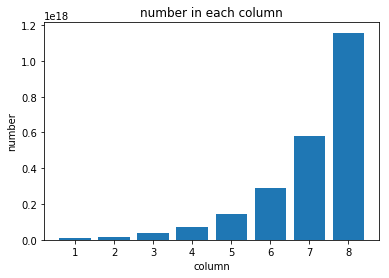

In [6]:
square_size = (8, 8)
board_ndarray = chess_board(square_size=square_size)

sum_board = board_ndarray.sum()
mean_board_columns = board_ndarray.mean(axis=0)

print("{}マスのチェス盤の小麦の合計：{:.1e}".format(square_size, sum_board))

plt.xlabel("column")
plt.ylabel("number")
plt.title("number in each column")
plt.bar(np.arange(1,9), mean_board_columns)
plt.show()

In [7]:
# meanメソッドで正しく軸が指定できているか確認

square_size = (3, 5)
board_ndarray = chess_board(square_size=square_size)

mean_board_columns = board_ndarray.mean(axis=0)
print("{}マスのチェス盤で各列の平均を求めるとshapeは：{}".format(square_size, mean_board_columns.shape)) #(5,)->正しい

(3, 5)マスのチェス盤で各列の平均を求めるとshapeは：(5,)


In [8]:
# meanメソッドの軸の関係の確認

sample_ndarray = np.ones((3, 5, 7))
print("元のndarray：{}".format(sample_ndarray.shape))
print("axis=0で平均をとった場合：{}".format(sample_ndarray.mean(axis=0).shape))
print("axis=1で平均をとった場合：{}".format(sample_ndarray.mean(axis=1).shape))
print("axis=2で平均をとった場合：{}".format(sample_ndarray.mean(axis=2).shape))

元のndarray：(3, 5, 7)
axis=0で平均をとった場合：(5, 7)
axis=1で平均をとった場合：(3, 7)
axis=2で平均をとった場合：(3, 5)


In [9]:
# sumメソッドで返ってきた値はndarrayではなくnumpy.float64型になっている。
print("sum_boardの型：{}".format(type(sum_board)))

sum_boardの型：<class 'numpy.float64'>


### 【問題4】小麦の数のヒートマップ
**ポイント：heat_mapの使い方**

8×8マスのチェス盤の小麦の数をヒートマップとして可視化してください。

#### （解説）

`plt.pcolor()`にndarrayを渡すだけです。


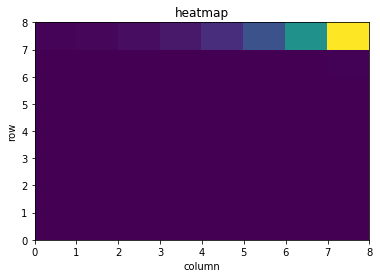

In [10]:
square_size = (8, 8)
board_ndarray = chess_board(square_size=square_size)

plt.xlabel("column")
plt.ylabel("row")
plt.title("heatmap")
plt.pcolor(board_ndarray)
# plt.pcolor(board_ndarray[::-1]) # スライシングで上下を反転させる事も可能。
plt.show()

### 【問題5】後半は前半の何倍か
**ポイント：スライスとsumの学習**

チェス盤の後半にある小麦の数は前半にある小麦の数の何倍かを求めてください。前半とは配列の0から3行目、後半は4から7行目です。

#### （解説）

スライシングで半分の行だけを取得した上で`sum`メソッドを使います。

In [11]:
square_size = (8, 8)
board_ndarray = chess_board(square_size=square_size)

first_half = board_ndarray[:4, :].sum()
second_half = board_ndarray[4:, :].sum()

rate = second_half/first_half

print("後半は前半の{}倍".format(rate))

後半は前半の4294967296.0倍


### 【問題6】他の計算方法によるn×mマスへの拡張
**ポイント：pythonのリスト以外に、numpyのappendとブロードキャストで動かしてみよう！！**

問題2と同様の「n×mマスのチェス盤の小麦の数を記したndarrayを返す関数」を、`np.append()`を使ったものと、ブロードキャストを使ったもので新たに作成してください。

それらの関数を使い8×8マスのチェス盤の小麦の数を再び求めてください。

#### （解説）

サンプルコードを参考に関数化してください。

型に気をつけないと最後のマスの値が正しく計算できません。`uint64`で扱われるように`astype`メソッドで指定していきます。

In [12]:
def chess_board_with_npappend(square_size=(8, 8)):
    """
    小麦とチェス盤の逸話の計算を行う関数
    
    Parameters:
    -----------------
    square_size : tuple of int
        マス目の数（default: (8, 8)）
    Returns
    -----------------
    board_ndarray：ndarray, shape(square_size)
        チェス盤の上の小麦の数を記録した配列
    """
    n_squares = square_size[0]*square_size[1]
    board_ndarray = np.array([1]).astype(np.uint64) # uinit64の指定をする
    times = np.array([2]).astype(np.uint64)
    for _ in range(n_squares - 1):
        board_ndarray = np.append(board_ndarray, times*board_ndarray[-1])
    board_ndarray = board_ndarray.reshape(square_size)
    return board_ndarray

square_size = (8, 8)
board_ndarray = chess_board_with_npappend(square_size=square_size)

print("{}マスのチェス盤：\n{}".format(square_size, board_ndarray))

(8, 8)マスのチェス盤：
[[                  1                   2                   4
                    8                  16                  32
                   64                 128]
 [                256                 512                1024
                 2048                4096                8192
                16384               32768]
 [              65536              131072              262144
               524288             1048576             2097152
              4194304             8388608]
 [           16777216            33554432            67108864
            134217728           268435456           536870912
           1073741824          2147483648]
 [         4294967296          8589934592         17179869184
          34359738368         68719476736        137438953472
         274877906944        549755813888]
 [      1099511627776       2199023255552       4398046511104
        8796093022208      17592186044416      35184372088832
       70368744177664     

In [13]:
def chess_board_with_broadcast(square_size=(8, 8)):
    """
    小麦とチェス盤の逸話の計算を行う関数
    
    Parameters:
    -----------------
    square_size : tuple of int
        マス目の数（default: (8, 8)）
    Returns
    -----------------
    board_ndarray：ndarray, shape(square_size)
        チェス盤の上の小麦の数を記録した配列
    """
    n_squares = square_size[0]*square_size[1]
    indices_of_squares = np.arange(n_squares).astype(np.uint64)
    board_ndarray = 2**indices_of_squares
    board_ndarray = board_ndarray.reshape(square_size)
    return board_ndarray

square_size = (8, 8)
board_ndarray = chess_board_with_broadcast(square_size=square_size)

print("{}マスのチェス盤：\n{}".format(square_size, board_ndarray))

(8, 8)マスのチェス盤：
[[                  1                   2                   4
                    8                  16                  32
                   64                 128]
 [                256                 512                1024
                 2048                4096                8192
                16384               32768]
 [              65536              131072              262144
               524288             1048576             2097152
              4194304             8388608]
 [           16777216            33554432            67108864
            134217728           268435456           536870912
           1073741824          2147483648]
 [         4294967296          8589934592         17179869184
          34359738368         68719476736        137438953472
         274877906944        549755813888]
 [      1099511627776       2199023255552       4398046511104
        8796093022208      17592186044416      35184372088832
       70368744177664     

### 【問題7】計算時間の比較
**ポイント：計算時間は ブロードキャスト＜pythonのappend＜np.append、とブロードキャストが早い！！**

3種類の方法を見てきました。それぞれの計算時間をJupyter Notebookの`%%timeit`を用いて計測し、比較と考察を行ってください。

`%%timeit`はセル内のコードを複数回実行し、その平均実行時間を出力する働きをします。

#### （解説）

それぞれの関数を`%%timeit`で計算してみましょう。

複数のマス目で実験してみると、それぞれの特徴がより掴みやすいかと思います。

ndarrayの`np.append()`はPythonのリストの`append()`よりもかなり遅くなる点が重要です。ndarrayの場合、要素を追加するためにメモリの領域を毎回確保しなおすため動作が遅くなります。

ブロードキャストはある程度マス目が増えてくるとPythonのリストの`append()`を使った場合よりも早くなります。べき乗の計算を複数行うのは一見非効率ですが、ndarrayに対する演算がそれだけ高速に行えるということです。

In [14]:
square_size = (8, 8)

In [15]:
%%timeit # リストのappend計算
board_ndarray = chess_board(square_size=square_size)

18.3 µs ± 2.23 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [16]:
%%timeit # npappend計算
board_ndarray = chess_board_with_npappend(square_size=square_size)

318 µs ± 5.44 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [17]:
%%timeit # ブロードキャスト計算（ある程度マス目が増えるとpython の append よりも早い）
board_ndarray = chess_board_with_broadcast(square_size=square_size)

3.84 µs ± 49.6 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [18]:
square_size = (100, 100)

In [19]:
%%timeit # リストのappend計算
board_ndarray = chess_board(square_size=square_size)

10 ms ± 513 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [20]:
%%timeit # npappend計算
board_ndarray = chess_board_with_npappend(square_size=square_size)

69.7 ms ± 3.12 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [21]:
%%timeit # ブロードキャスト計算（ある程度マス目が増えるとpython の append よりも早い）
board_ndarray = chess_board_with_broadcast(square_size=square_size)

110 µs ± 2.72 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
